# 4. Exploratory Data Analysis

**탐색적 데이터 분석을 통해 데이터를 통달해봅시다.** with [Titanic Data](https://www.kaggle.com/c/titanic)

0. 라이브러리 준비
1. 분석의 목적과 변수 확인
2. 데이터 전체적으로 살펴보기
3. 데이터의 개별 속성 파악하기

## 0. 라이브러리 준비

In [ ]:
!pip install --upgrade --force-reinstall --no-deps kaggle
from google.colab import files
files.upload()

     |████████████████████████████████| 61kB 3.1MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.12-cp37-none-any.whl size=73053 sha256=0b37d772df10b0f51a5cc3d94dfe9ead443818dd3ab4fac808febc39b58077e2
  Stored in directory: /root/.cache/pip/wheels/a1/6a/26/d30b7499ff85a4a4593377a87ecf55f7d08af42f0de9b60303
Successfully built kaggle
  Found existing installation: kaggle 1.5.12
    Uninstalling kaggle-1.5.12:
      Successfully uninstalled kaggle-1.5.12


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"cheshirecoder","key":"4fa22a082a7a2e0f7373ede600bcf5cc"}'}

In [ ]:
# !mkdir ~/.kaggle
# !mv kaggle.json ~/.kaggle/
# !chmod 600 ~/.kaggle/kaggle.json
# 웹페이지 가서 동의를 해야 다운로드 가능..
!kaggle competitions download -c titanic

  0% 0.00/34.1k [00:00<?, ?B/s]
100% 34.1k/34.1k [00:00<00:00, 25.3MB/s]


In [ ]:
!unzip titanic.zip

Archive:  titanic.zip
  inflating: gender_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


## 1. 분석의 목적과 변수 확인

## 2. 데이터 전체적으로 살펴보기

## 3. 데이터의 개별 속성 파악하기

## Mission : It's Your Turn!

### 1. 본문에서 언급된 Feature를 제외하고 유의미한 Feature를 1개 이상 찾아봅시다.

- Hint : Fare? Sibsp? Parch?

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

titanic_df = pd.read_csv("train.csv")
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
titanic_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


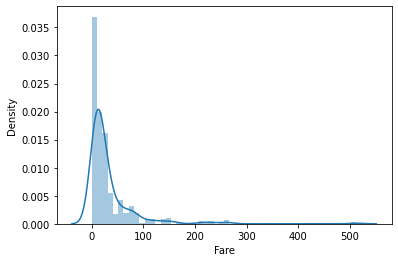

In [ ]:
sns.distplot(titanic_df['Fare'])

In [ ]:
titanic_df['Fare-sz'] = np.nan
sz = 40
for i in range(0, 1 + (int(titanic_df['Fare'].max()) // sz)):
    titanic_df.loc[(titanic_df['Fare'] >= i * sz) & (titanic_df['Fare'] < (i + 1) * sz), 'Fare-sz'] = i + 1

In [ ]:
pd.crosstab([titanic_df.Sex, titanic_df.Survived], [titanic_df['Fare-sz']], margins=True).style.background_gradient(cmap='Blues')

Fare가 높으면 사망율이 낮다.

상위 Fare에서는 사망자가 거의 없다.

대부분의 사망자는 0~40의 Fare를 갖는 경우이다.

In [ ]:
pd.crosstab([titanic_df.Sex, titanic_df.Survived], [titanic_df.SibSp], margins=True).style.background_gradient(cmap='Blues')

SibSp가 높으면 더 잘 죽는다.

여자는 5이상, 남자는 3이상이면 (거의) 죽는다.

In [ ]:
pd.crosstab([titanic_df.Sex, titanic_df.Survived], [titanic_df.Parch], margins=True).style.background_gradient(cmap='Blues')

Parch 역시 생존률에 부정적인 영향을 준다.

### 2. [Kaggle](https://www.kaggle.com/datasets)에서 Dataset을 찾고, 이 Dataset에서 유의미한 Feature를 3개 이상 찾고 이를 시각화해봅시다.

함께 보면 좋은 라이브러리 document
- [numpy]()
- [pandas]()
- [seaborn]()
- [matplotlib]()

In [ ]:
!kaggle datasets download infamous25700/pornhub-models-and-pornostars-18
!unzip pornhub-models-and-pornostars-18.zip

 32% 5.00M/15.5M [00:00<00:00, 48.9MB/s]
100% 15.5M/15.5M [00:00<00:00, 105MB/s] 
Archive:  pornhub-models-and-pornostars-18.zip
  inflating: models_v3.csv           
  inflating: pornstars_v3.csv        


In [ ]:
ps_df = pd.read_csv('models_v3.csv')
ps_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81774 entries, 0 to 81773
Data columns (total 47 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   URL                     81774 non-null  object 
 1   Name                    81774 non-null  object 
 2   Bio                     81774 non-null  object 
 3   Subscribers             81774 non-null  object 
 4   Videos_views            81774 non-null  object 
 5   Pornhub_rank            81774 non-null  int64  
 6   Model_rank              81610 non-null  float64
 7   Public_videos           79561 non-null  float64
 8   Paid_videos             28760 non-null  float64
 9   Fan_club_material       17517 non-null  float64
 10  Verified_pornstar       81774 non-null  int64  
 11  Verified_member         81774 non-null  int64  
 12  Premium_user            81774 non-null  int64  
 13  Pornhub_awards_winner   81774 non-null  int64  
 14  Age                     81774 non-null

In [ ]:
ps_df.describe()

,Pornhub_rank,Model_rank,Public_videos,Paid_videos,Fan_club_material,Verified_pornstar,Verified_member,Premium_user,Pornhub_awards_winner
count,81774.000000,81610.000000,79561.000000,28760.000000,17517.000000,81774.0,81774.0,81774.000000,81774.000000
mean,56429.579463,41934.357946,13.392353,7.841620,23.928355,0.0,1.0,0.032651,0.000024
std,26974.421003,24732.503639,36.149875,35.140148,130.965379,0.0,0.0,0.177722,0.004945
min,11.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.0,0.000000,0.000000
25%,34496.250000,20816.250000,3.000000,1.000000,2.000000,0.0,1.0,0.000000,0.000000
50%,58344.500000,41406.500000,6.000000,2.000000,5.000000,0.0,1.0,0.000000,0.000000
75%,79600.750000,62285.750000,13.000000,4.000000,15.000000,0.0,1.0,0.000000,0.000000
max,100240.000000,134458.000000,2910.000000,2268.000000,7570.000000,0.0,1.0,1.000000,1.000000


In [ ]:
fm_df = ps_df[(ps_df['Gender'] == 'Female') & (ps_df['Measurements'].str.len() > 5) & (ps_df['Video Views'] != '-')]

In [ ]:
fm_df[['B', 'W', 'H']] = fm_df['Measurements'].str.split('-', expand=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [ ]:
for k in ('B', 'W', 'H'):
    fm_df[k] = fm_df[k].astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
fm_df['Video Views'] = fm_df['Video Views'].str.replace(',','').astype('int64')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
fm_df['lview'] = np.log10(fm_df['Video Views']).astype(int)
pd.crosstab([fm_df.B], [fm_df.lview], margins=True).style.background_gradient(cmap='Blues')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


lview,0,1,2,3,4,5,6,7,8,All
B,,,,,,,,,,
24,3,14,28,55,38,18,6,1,0,163
27,0,3,10,16,18,5,1,1,0,54
28,0,1,11,33,28,11,2,0,0,86
29,0,2,8,25,13,5,7,0,0,60
30,0,3,16,51,44,23,10,4,2,153
31,1,1,12,22,16,13,3,4,0,72
32,1,24,80,227,203,106,63,17,1,722
33,0,4,14,48,33,27,14,9,2,151
34,4,32,137,365,243,114,59,19,3,976


In [ ]:
pd.crosstab([fm_df.W], [fm_df.lview], margins=True).style.background_gradient(cmap='Blues')

lview,0,1,2,3,4,5,6,7,8,All
W,,,,,,,,,,
8,1,11,31,53,43,12,4,2,0,157
18,2,8,18,55,32,6,4,2,0,127
19,0,1,4,20,14,4,2,0,0,45
20,0,2,15,40,22,12,6,3,0,100
21,0,5,7,19,22,8,3,1,0,65
22,1,3,14,52,31,17,9,0,0,127
23,0,2,18,56,37,24,14,8,2,161
24,1,17,62,147,131,82,56,32,6,534
25,1,10,44,119,89,65,36,15,2,381


In [ ]:
pd.crosstab([fm_df.H], [fm_df.lview], margins=True).style.background_gradient(cmap='Blues')

lview,0,1,2,3,4,5,6,7,8,All
H,,,,,,,,,,
20,2,4,20,42,29,6,2,0,0,105
21,1,3,8,11,13,4,3,1,0,44
23,0,2,5,15,18,6,0,1,0,47
24,0,3,15,36,32,13,6,0,0,105
25,0,5,7,16,16,12,4,0,0,60
26,0,8,22,40,20,10,6,2,0,108
27,0,4,21,35,22,12,5,2,0,101
28,0,4,28,67,45,15,4,1,0,164
29,0,5,15,26,28,8,4,1,0,87


In [ ]:
fm_df['BW'] = fm_df['B'] - fm_df['W']
# fm_df['BW'] = fm_df['BW'] / fm_df['W']
fm_df['BW'] = fm_df['BW'].astype(int)
pd.crosstab([fm_df.BW], [fm_df.lview], margins=True).style.background_gradient(cmap='Blues')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


lview,0,1,2,3,4,5,6,7,8,All
BW,,,,,,,,,,
-38,0,0,1,0,0,0,0,0,0,1
-37,0,0,0,1,0,0,0,0,0,1
-36,0,0,0,1,0,0,0,0,0,1
-35,0,0,1,0,0,0,0,0,0,1
-34,0,0,0,0,0,0,1,0,0,1
-33,0,0,2,0,0,1,0,0,0,3
-32,0,0,1,2,0,0,0,0,0,3
-31,0,0,2,3,1,2,0,0,0,8
-30,0,0,0,5,0,0,0,0,0,5


In [ ]:
fm_df['WH'] = fm_df['H'] - fm_df['W']
# fm_df['WH'] = fm_df['WH'] / fm_df['W']
fm_df['WH'] = fm_df['WH'].astype(int)
pd.crosstab([fm_df.WH], [fm_df.lview], margins=True).style.background_gradient(cmap='Blues')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


lview,0,1,2,3,4,5,6,7,8,All
WH,,,,,,,,,,
-41,0,0,0,0,0,0,1,0,0,1
-38,0,0,1,0,0,0,0,0,0,1
-36,0,0,0,0,0,1,0,0,0,1
-30,0,0,0,1,0,0,0,0,0,1
-28,0,0,0,0,1,0,0,0,0,1
-27,0,0,1,0,0,0,0,0,0,1
-26,0,0,1,0,0,1,0,0,0,2
-23,0,1,0,0,1,0,0,0,0,2
-20,0,1,0,0,2,0,0,0,0,3


가슴 - 허리 - 엉덩이의 치수는 사람들이 가장 선호하는 구간이 있으며, 비율 보다는 특정 구간을 선호한다.

그 구간에서 벗어나면 수요가 크게 줄어든다.